1 K-Nearest Neighbors (K-NN)
==
Algoritmo simple. Datos con diferentes etiquetas, distribuidos en un espacio (ejemplo bidimensional).

Se resuelven problemas de clasificación o de regresión.

Se debe tomar una métrica de distancia, desde un punto de carry a los k-vecinos más cercanos a ese punto.

Para diferentes valores de k se obtienen diferentes gráficos.

Over fitting: se fittean demasiado el modelo a los datos de entrenamiento $\Rightarrow$ cuesta realizar predicciones sobre otros datos que no sean de entrenamiento. Obtengo resultados malos. 

A medida que aumento el valor de k:
- decrece la presicion de mi modelo sobre los datos de entrenamiento
- mi capacidad de generalizar mis rtados aumenta

También puedo asignar pesos diferentes en funcion de la distancia

El algoritmo (k-NN) es una forma de aprendizaje automático supervisado que se utiliza para predecir categorías, sklearn.neighbors proporciona funcionalidad para los métodos de aprendizaje basados en vecinos supervisados y sin supervisión. El aprendizaje supervisado basado en vecinos se presenta en dos tipos: 

>Clasificación para datos con etiquetas discretas

>Regresión para datos con etiquetas continúas.

Paso 1
==
Primero debemos importar las librerías a utilizar:


In [1]:
import numpy as np
import matplotlib.pyplot as plt

#importamos una lista de colores
from matplotlib.colors import ListedColormap 

# lo más importante: importamos el módulo neighbors, el cual contiene
# nuestro algoritmo de knn, y también el datasets
from sklearn import neighbors, datasets

Paso 2
==
De datasets importamos el conjunto de datos de iris() y establecemos el número de vecino más cercano en 15


In [2]:
# extraemos nuestro dataset de iris
iris = datasets.load_iris()

# seteamos nuestro valor de vecinos cercanos
n_neighbors = 15

La librería Iris se encuentra separada en: 
    
>data que contiene todas las características.

>target que contiene las clases asociadas a esas características. 


In [3]:
# Se imprimen los dos primeros features (ancho y alto de los pétalos)
# solo tomaremos los primeros 2 features, para ejemplificar.
# selecciono todas las filas(:), y las primeras dos columnas (:2)
X = iris.data[:,:2] 
print(X)

# Este es un vector fila
y = iris.target
print(y)


[[5.1 3.5]
 [4.9 3. ]
 [4.7 3.2]
 [4.6 3.1]
 [5.  3.6]
 [5.4 3.9]
 [4.6 3.4]
 [5.  3.4]
 [4.4 2.9]
 [4.9 3.1]
 [5.4 3.7]
 [4.8 3.4]
 [4.8 3. ]
 [4.3 3. ]
 [5.8 4. ]
 [5.7 4.4]
 [5.4 3.9]
 [5.1 3.5]
 [5.7 3.8]
 [5.1 3.8]
 [5.4 3.4]
 [5.1 3.7]
 [4.6 3.6]
 [5.1 3.3]
 [4.8 3.4]
 [5.  3. ]
 [5.  3.4]
 [5.2 3.5]
 [5.2 3.4]
 [4.7 3.2]
 [4.8 3.1]
 [5.4 3.4]
 [5.2 4.1]
 [5.5 4.2]
 [4.9 3.1]
 [5.  3.2]
 [5.5 3.5]
 [4.9 3.6]
 [4.4 3. ]
 [5.1 3.4]
 [5.  3.5]
 [4.5 2.3]
 [4.4 3.2]
 [5.  3.5]
 [5.1 3.8]
 [4.8 3. ]
 [5.1 3.8]
 [4.6 3.2]
 [5.3 3.7]
 [5.  3.3]
 [7.  3.2]
 [6.4 3.2]
 [6.9 3.1]
 [5.5 2.3]
 [6.5 2.8]
 [5.7 2.8]
 [6.3 3.3]
 [4.9 2.4]
 [6.6 2.9]
 [5.2 2.7]
 [5.  2. ]
 [5.9 3. ]
 [6.  2.2]
 [6.1 2.9]
 [5.6 2.9]
 [6.7 3.1]
 [5.6 3. ]
 [5.8 2.7]
 [6.2 2.2]
 [5.6 2.5]
 [5.9 3.2]
 [6.1 2.8]
 [6.3 2.5]
 [6.1 2.8]
 [6.4 2.9]
 [6.6 3. ]
 [6.8 2.8]
 [6.7 3. ]
 [6.  2.9]
 [5.7 2.6]
 [5.5 2.4]
 [5.5 2.4]
 [5.8 2.7]
 [6.  2.7]
 [5.4 3. ]
 [6.  3.4]
 [6.7 3.1]
 [6.3 2.3]
 [5.6 3. ]
 [5.5 2.5]
 [5.5 2.6]

Paso 4
==
Creamos un espacio bidimensional que vamos a mallar y vamos a clasiicar todos los puntos dentro del espacio bidimensional que vamos a crear en una de esas 3 categorias (``y``)

Para analizar los datos visualmente crearemos un mapa de colores mediante ListedColormap a partir de una lista de colores, y utilizaremos un mallado con un paso de 0.2 


In [4]:
h = .02  

# Asignamos algunos colores de ListedColormap de matplotlib
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])


Paso 5
==
Ahora realizaremos dos clasificaciones, una para un peso uniforme y otra para un peso en función al inverso de la distancia.


C:\Users\vguar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\vguar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

[2 0 2]
[2 0 1]


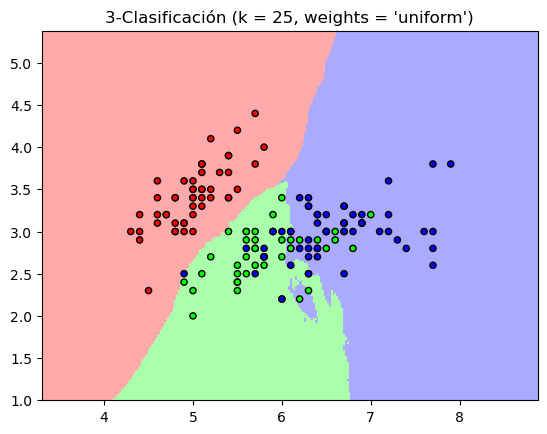

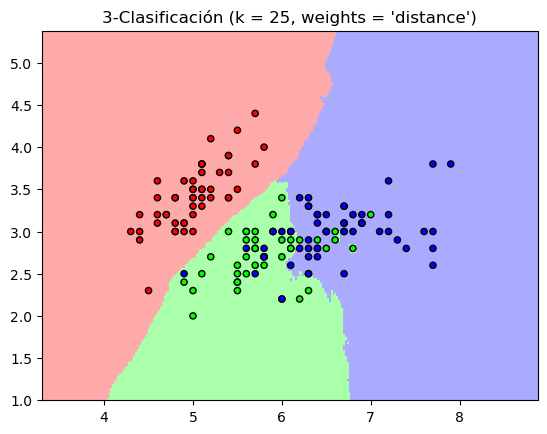

In [5]:

n_neighbors = 25

# El código se encuentra dentro de un loop for, el cual está loopeando sobre las listas
# uniform y distance.
# Estamos probando dos tipos de clasificadores por knn
#  *  en uno asignamos pesos uniformes a la influencia que tienen nuestros nn a la clasificación
#  *  en la segunda corrida del ciclo for, se asignan pesos diferentes de los nn en función a la distancia 
#     nuestro punto de clasificación



for weights in ['uniform', 'distance']:
    # Creamos una instancia del clasificador de vecinos más cercanos y le pasamos los datos mediante fit().
    # El primer párametro de KNeighborsClassifier es con cuantos vecinos quiero clasificar y el segundo el tipo de peso a utilizar.
    clf = neighbors.KNeighborsClassifier(n_neighbors, weights = weights)
    clf.fit(X, y)

    # Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1 # intervalo x
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1 # intervalo y
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h)) # h definida en PASO 2
    
    # realizamos predicciones
    # ravel(): pongo en forma de vectore
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    #mode, _ = stats.mode(Z, axis=1, keepdims=True)

    # Agregamos el resultado al gráfico
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, shading = 'auto', cmap = cmap_light) # cmap_light definido en PASO 4

    # Ploteo los datos de entrenamiento
    plt.scatter(X[:, 0], X[:, 1], c = y, cmap = cmap_bold, edgecolor = 'k', s = 20)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("3-Clasificación (k = %i, weights = '%s')" % (n_neighbors, weights))
    
    #Ploteo un nuevo dato  
    Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
    Yn = clf.predict(Xn)
    print(Yn)
    
plt.show()



los colores de fondo es la clasificacion que realiza nuestro modelo entrenado sobre el plano 2D que hemos generado.
Las clases azules y verdes están un poco superpuestas.

2.- Arboles de decisiones
==
Ejemplo del astigmatismo.
___

Está basado en la particion binaria recursiva. Cada descomposición es un rtado binario (es decir, puede ser true or false) 

La primera pregunta es la raíz. La categoría son las hojas. La preguntas que se realizan son nodos. También estan las profundidades (cantidad de preguntas consecutivas más larga)


Veamos este ejemplo:
==
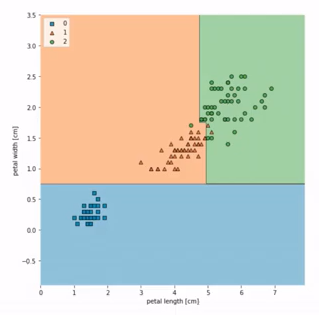
A lo largo de los dos features buscamos de manera de mantener uno de eso features constantes una separacion que me clasifique los puntos.
La ubicacion de ese criterio que me separa los puntos se ajusta de manera iterativa en función de la función de costo que depende de los elementos que quedan mal clasificados. Se trata de minimizar una función de costo.
En la siguiente etapa de iteración, los elementos azules quedan bien clasificados, pero sí se necesita continuar dividiendo las regiones superiores. La siguiente etapa lo que hace es buscas la posicion de la linea vertical.
Esto se detiene cuando:
- el nivel de impuresa que se obtienen en las hojas del arbol
- la profundidad del arbol: cantidad máx de iteraciones alcanzada. No seguimos avanzando infinitamente
- hasta obtener cierta cantidad de elementos en cada hoja.


Un árbol de decisiones se asemeja a las raíces de un árbol, en donde partimos de un conjunto de datos con determinadas características, que llamaremos raíz principal y que iremos descomponiendo por atributos, en ramas a partir de una determinada clasificación. Cada descomposición lleva asociada una condición que puede resultar verdadera o falsa y que se encuentra relacionada a una caracterización específica. 
Podríamos tener  por ejemplo el atributo “tipo de vehículo” con valores:
    
>Camionetas 

>Autos

Y el atributo “tracción”, con valores:
    
>Cuatro ruedas

>Dos ruedas


En base a estos atributos podríamos crear un árbol en el cual la primera división se realice por “tipo de vehículo” y luego por “tracción” o al revés. Esta división la realizaremos a partir de un algoritmo que optimice la forma en la cual se lleva a cabo la división en base a un análisis probabilístico.
Cuanto más profundo es el árbol, más complejas son las reglas de decisión y más se ajusta el modelo


In [6]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [7]:
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# exportamos este módulo que viene de visualización de grafos
# nos permite visualizar los rtados del arbol de decisión
from sklearn.tree import export_graphviz
import graphviz

import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [8]:
iris = load_iris()

In [9]:
X = iris.data[:,:2] # solo tomaremos los primeros 2 features, para ejemplificar.
Y = iris.target

In [10]:
# train_test_split(X, Y): nos permite dividir la data de entrenamiento y de testeo
X_entrenamiento, X_test, y_entrenamiento, y_test = train_test_split(X, Y)

In [11]:
# criterio de parada: profundidad de 3 nodos de nuestro arbol
arbol = DecisionTreeClassifier(max_depth = 3)

In [12]:
arbol.fit(X_entrenamiento, y_entrenamiento)

DecisionTreeClassifier(max_depth=3)

In [13]:
# accuracy medio sobre todas las clases
arbol.score(X_test, y_test)

0.7368421052631579

In [14]:
arbol.score(X_entrenamiento, y_entrenamiento)

0.8392857142857143

In [15]:
import os
# Usuarios de Windows:
os.environ["PATH"] += os.pathsep + 'C:\Program Files\Graphviz\bin'


In [16]:
# le damos un nombre al archivo
# filled: el coloreado
# impuresa: no necesitamos quedarnos con eso
export_graphviz(arbol, out_file = 'arbol1.dot', class_names=iris.target_names, feature_names=iris.feature_names[:2], impurity = False, filled = True)

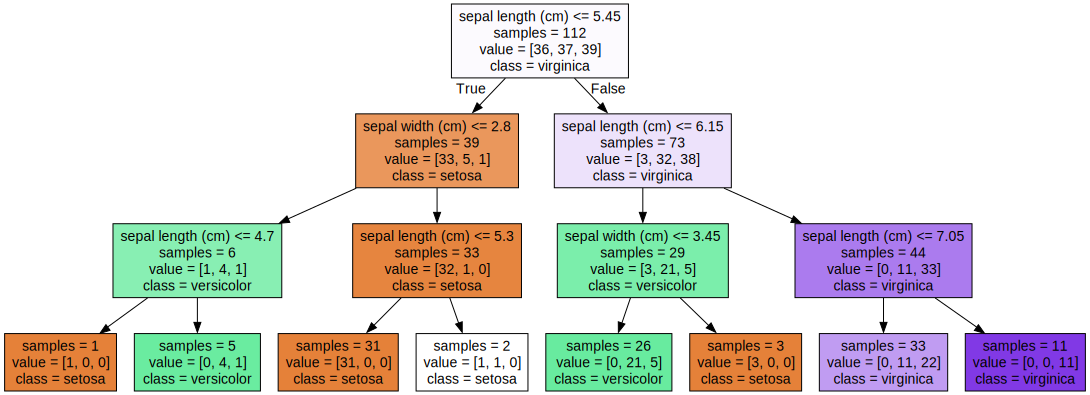

In [17]:
with open('arbol1.dot') as f:
    dot_graph = f.read()
graphviz.Source(dot_graph)


In [18]:
from sklearn.tree import plot_tree

[Text(0.5, 0.875, 'X[0] <= 5.45\ngini = 0.666\nsamples = 112\nvalue = [36, 37, 39]'),
 Text(0.25, 0.625, 'X[1] <= 2.8\ngini = 0.267\nsamples = 39\nvalue = [33, 5, 1]'),
 Text(0.125, 0.375, 'X[0] <= 4.7\ngini = 0.5\nsamples = 6\nvalue = [1, 4, 1]'),
 Text(0.0625, 0.125, 'gini = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.1875, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [0, 4, 1]'),
 Text(0.375, 0.375, 'X[0] <= 5.3\ngini = 0.059\nsamples = 33\nvalue = [32, 1, 0]'),
 Text(0.3125, 0.125, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(0.4375, 0.125, 'gini = 0.5\nsamples = 2\nvalue = [1, 1, 0]'),
 Text(0.75, 0.625, 'X[0] <= 6.15\ngini = 0.535\nsamples = 73\nvalue = [3, 32, 38]'),
 Text(0.625, 0.375, 'X[1] <= 3.45\ngini = 0.435\nsamples = 29\nvalue = [3, 21, 5]'),
 Text(0.5625, 0.125, 'gini = 0.311\nsamples = 26\nvalue = [0, 21, 5]'),
 Text(0.6875, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0, 0]'),
 Text(0.875, 0.375, 'X[0] <= 7.05\ngini = 0.375\nsamples = 44\nvalue = [0, 11, 33]

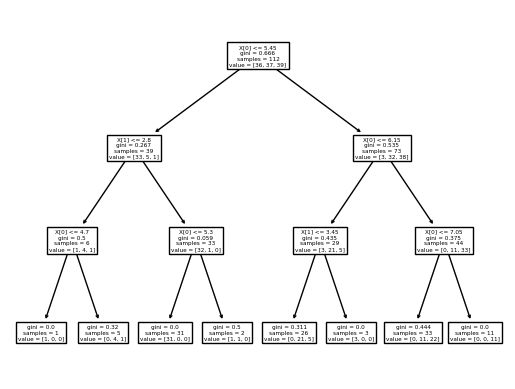

In [19]:
plot_tree(arbol)

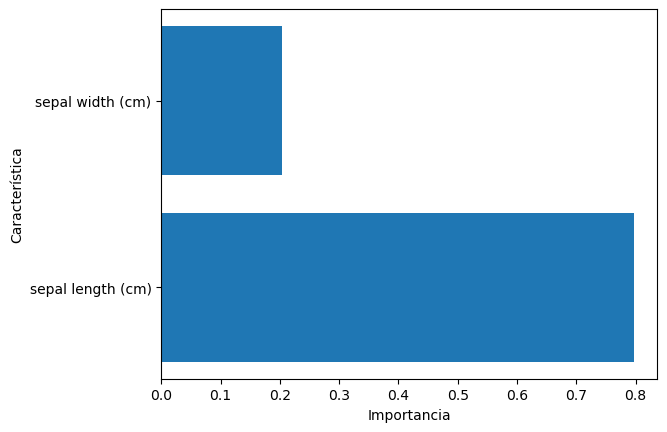

In [20]:
caracteristica = 2

# feature importance nos permite evaluar la importancia del feature en función
# de la reducción de la función de costo
plt.barh(range(caracteristica),arbol.feature_importances_)
plt.yticks(np.arange(caracteristica),iris.feature_names[:2])
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()


In [21]:
h = .02  
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

[2 0 2]


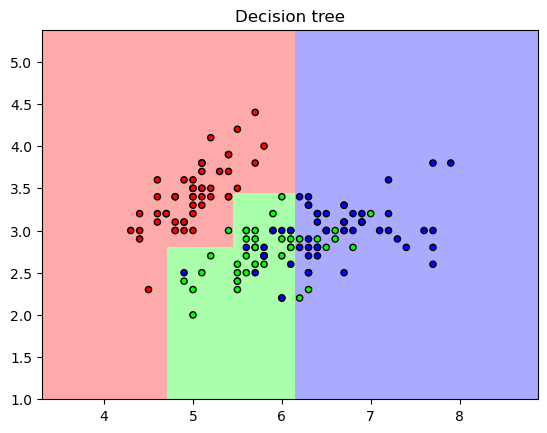

In [22]:
# Establecemos los límites del gráfico y asignamos un color a cada punto de malla.
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = arbol.predict(np.c_[xx.ravel(), yy.ravel()])

# Agregamos el resultado al gráfico
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, shading='auto', cmap=cmap_light)

# Ploteo los datos de entrenamiento
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("Decision tree")
    
# #Ploteo un nuevo dato  
Xn = np.array([[7.3,3], [5.1,2.9], [6.4,3.2]])
Yn = arbol.predict(Xn)
print(Yn)
plt.show()
